In [1]:
import pandas as pd
data = pd.read_csv('ncr_ride_bookings.csv', header=None, low_memory=False)
print(data.head(10))

           0         1             2                3             4   \
0        Date      Time    Booking ID   Booking Status   Customer ID   
1  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
2  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
3  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
4  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
5  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
6  2024-02-06  09:44:56  "CNR4096693"        Completed  "CID4670564"   
7  2024-06-17  15:45:58  "CNR2002539"        Completed  "CID6800553"   
8  2024-03-19  17:37:37  "CNR6568000"        Completed  "CID8610436"   
9  2024-09-14  12:49:09  "CNR4510807"  No Driver Found  "CID7873618"   

              5                    6                  7         8         9   \
0   Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT   
1          eBike          Palam Vihar          

Dataset Shape: (150000, 21)

First 5 rows:
         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer C

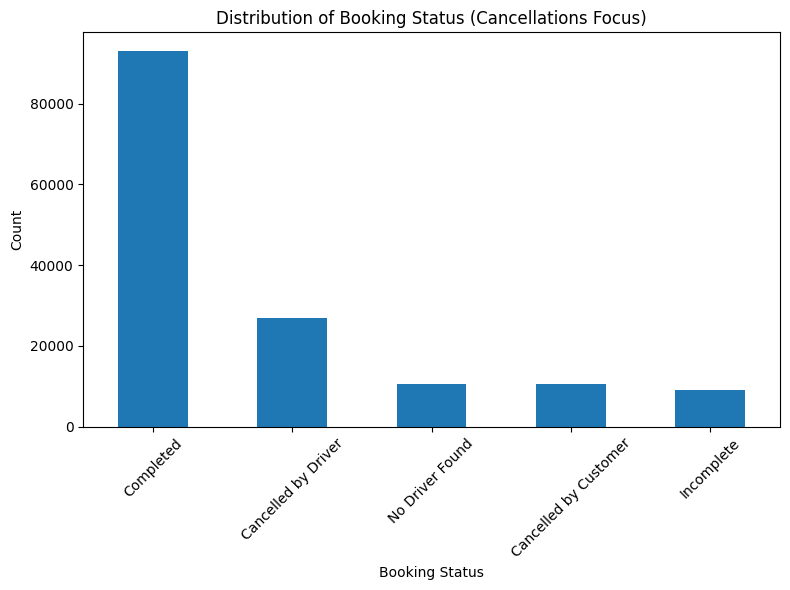


=== Summary of Cancellation Reasons ===

Reason for cancelling by Customer:
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

Cancelled Rides by Driver:
Cancelled Rides by Driver
1.0    27000
Name: count, dtype: int64

Driver Cancellation Reason:
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

Incomplete Rides:
Incomplete Rides
1.0    9000
Name: count, dtype: int64

Incomplete Rides Reason:
Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64

=== Handling NaN i

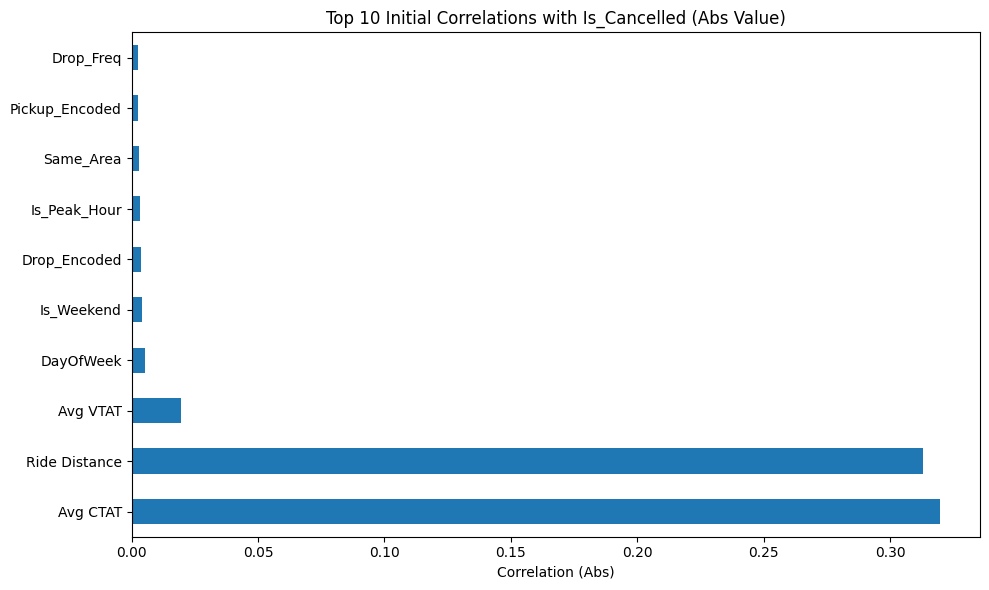


=== Fixing Spurious Correlation: Fill NaN with 0 ===
Avg VTAT: NaN from 0 to 0
Avg CTAT: NaN from 48000 to 0
Ride Distance: NaN from 48000 to 0
Booking Value: NaN from 48000 to 0

Fixed Correlations with Is_Cancelled (NaN=0):
Is_Peak_Hour      0.003
Hour              0.001
Month             0.001
Pickup_Freq      -0.002
Drop_Freq        -0.003
Pickup_Encoded   -0.003
Same_Area        -0.003
Drop_Encoded     -0.004
Is_Weekend       -0.004
DayOfWeek        -0.005
Avg VTAT         -0.019
Booking Value    -0.515
Ride Distance    -0.725
Avg CTAT         -0.844
dtype: float64

Fair Correlations (Excluding Completion Metrics):
Is_Peak_Hour      0.003
Hour              0.001
Month             0.001
Pickup_Freq      -0.002
Drop_Freq        -0.003
Pickup_Encoded   -0.003
Same_Area        -0.003
Drop_Encoded     -0.004
Is_Weekend       -0.004
DayOfWeek        -0.005
dtype: float64

Means of Completion Metrics by Is_Cancelled (after fill 0):
              Avg VTAT  Avg CTAT  Ride Distance  Bookin

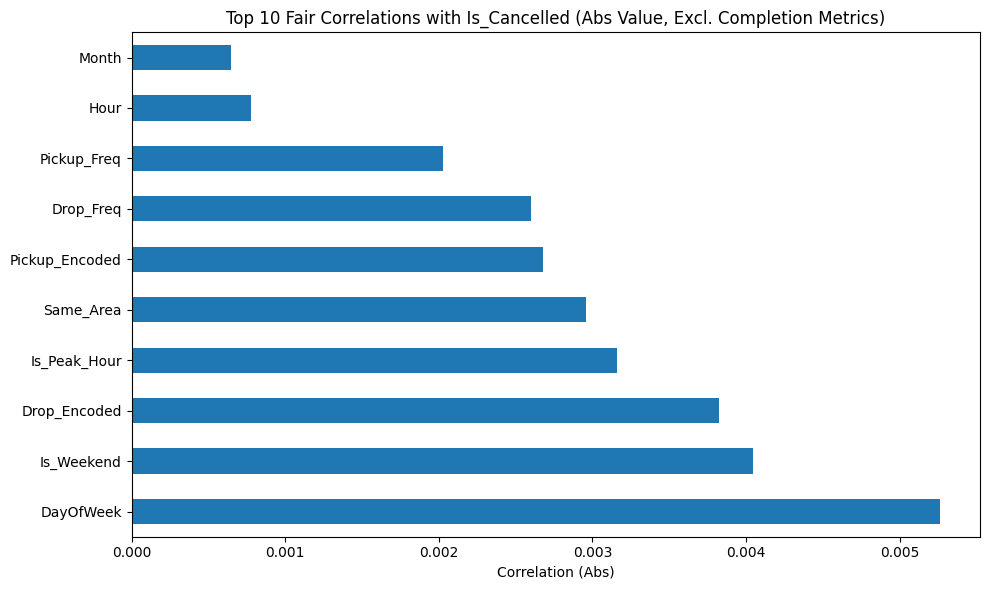


=== Chi-Square Test for Categorical Features vs Is_Cancelled ===
Vehicle Type: Chi2=6.23, p-value=0.3978
Payment Method: Chi2=0.90, p-value=0.9239
Booking Status: Chi2=150000.00, p-value=0.0000
  -> Significant association

Pickup_Grouped: Chi2=8.72, p-value=0.5592
Drop_Grouped: Chi2=7.57, p-value=0.6705

Processed data saved to 'ncr_ride_bookings_engineered_fixed.csv'


In [2]:
# Complete Integrated Code for Uber Cancellation Analysis
# Run this in a single Jupyter cell or split as needed. Assumes 'ncr_ride_bookings.csv' is in the working directory.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('ncr_ride_bookings.csv')

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 1: Descriptive Analysis
# Overall descriptive statistics for numerical columns
print("\n=== Descriptive Statistics (Numerical Columns) ===")
print(df.describe())

# Focus on cancellation-related aspects
# Assuming 'Booking Status' indicates cancellations (e.g., 'No Driver Found', 'Incomplete' vs 'Completed')
print("\n=== Descriptive Analysis for Cancellations ===")
cancellation_summary = df['Booking Status'].value_counts()
print("Booking Status Distribution:")
print(cancellation_summary)

# Group by Booking Status for key metrics (e.g., Avg VTAT, Avg CTAT, Ride Distance, Booking Value)
status_groups = df.groupby('Booking Status').agg({
    'Avg VTAT': ['mean', 'median', 'count'],
    'Avg CTAT': ['mean', 'median', 'count'],
    'Ride Distance': ['mean', 'median'],
    'Booking Value': ['mean', 'median'],
    'Customer ID': 'count'  # Total rides per status
}).round(2)
print("\nMetrics by Booking Status:")
print(status_groups)

# Visualize Booking Status distribution
plt.figure(figsize=(8, 6))
cancellation_summary.plot(kind='bar')
plt.title('Distribution of Booking Status (Cancellations Focus)')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional: Cancellation reasons (if applicable)
# Check for cancellation-related columns
cancel_cols = ['Reason for cancelling by Customer', 'Cancelled Rides by Driver', 
               'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason']
print("\n=== Summary of Cancellation Reasons ===")
for col in cancel_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))  # Top 10 values
    else:
        print(f"\n{col}: Column not found")

# Step 2: Replace NaN in 'Avg VTAT' with mean
print("\n=== Handling NaN in Avg VTAT ===")
print(f"NaN count in Avg VTAT before: {df['Avg VTAT'].isnull().sum()}")

# Calculate mean (ignoring NaNs)
vtat_mean = df['Avg VTAT'].mean()
print(f"Mean of Avg VTAT: {vtat_mean:.2f}")

# Replace NaNs with mean
df['Avg VTAT'] = df['Avg VTAT'].fillna(vtat_mean)

# Verify
print(f"NaN count in Avg VTAT after: {df['Avg VTAT'].isnull().sum()}")

# Step 3: Create Binary Target for Cancellations
df['Is_Cancelled'] = ((df['Booking Status'] != 'Completed') | 
                      (df['Incomplete Rides'].fillna(0) > 0)).astype(int)
print("\nCancellation Target Distribution:")
print(df['Is_Cancelled'].value_counts())

# Step 4: Feature Engineering for Date and Locations
print("\n=== Feature Engineering: Date and Time ===")
# Combine Date and Time into datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract features
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Month'] = df['Datetime'].dt.month
df['Is_Weekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 if weekend
df['Is_Peak_Hour'] = (((df['Hour'] >= 7) & (df['Hour'] <= 9)) | ((df['Hour'] >= 17) & (df['Hour'] <= 20))).astype(int)  # Rough peak hours

print("New Date/Time features added:")
print(df[['Hour', 'DayOfWeek', 'Month', 'Is_Weekend', 'Is_Peak_Hour']].head())
print(f"\nDate range: {df['Datetime'].min()} to {df['Datetime'].max()}")

print("\n=== Feature Engineering: Locations ===")
print(f"Unique Pickup Locations: {df['Pickup Location'].nunique()}")
print(f"Unique Drop Locations: {df['Drop Location'].nunique()}")

# Option 1: Frequency Encoding for Locations (simple numerical feature)
pickup_freq = df['Pickup Location'].value_counts().to_dict()
drop_freq = df['Drop Location'].value_counts().to_dict()
df['Pickup_Freq'] = df['Pickup Location'].map(pickup_freq)
df['Drop_Freq'] = df['Drop Location'].map(drop_freq)

# Option 2: Label Encoding (for correlation, but less interpretable)
le_pickup = LabelEncoder()
le_drop = LabelEncoder()
df['Pickup_Encoded'] = le_pickup.fit_transform(df['Pickup Location'])
df['Drop_Encoded'] = le_drop.fit_transform(df['Drop Location'])

# Ensure top_pickups and top_drops are defined
top_n = 10
top_pickups = df['Pickup Location'].value_counts().head(top_n).index
top_drops = df['Drop Location'].value_counts().head(top_n).index
print(f"Top {top_n} pickups: {list(top_pickups)}")
print(f"Top {top_n} drops: {list(top_drops)}")

# Option 3: One-Hot Encoding for Top N Locations (to avoid high dimensionality)
pickup_dummies = pd.get_dummies(df['Pickup Location'], prefix='Pickup').reindex(columns=[f'Pickup_{loc}' for loc in top_pickups], fill_value=0).astype(int)
drop_dummies = pd.get_dummies(df['Drop Location'], prefix='Drop').reindex(columns=[f'Drop_{loc}' for loc in top_drops], fill_value=0).astype(int)

# Add to df
df = pd.concat([df, pickup_dummies, drop_dummies], axis=1)

print("Sample Location Features:")
print(df[['Pickup_Freq', 'Drop_Freq', 'Pickup_Encoded', 'Drop_Encoded']].head())
print(f"\nTop {top_n} Pickup Dummies shape: {pickup_dummies.shape}")
print(pickup_dummies.columns.tolist())

# Optional: Simple 'Same Area' flag (heuristic)
def same_area(row):
    pickup_words = set(row['Pickup Location'].lower().split())
    drop_words = set(row['Drop Location'].lower().split())
    return 1 if pickup_words.intersection(drop_words) else 0

df['Same_Area'] = df.apply(same_area, axis=1)
print(f"\nSame_Area sample: {df['Same_Area'].value_counts()}")

# Step 5: Initial Correlation Analysis (Before Fixing Spurious)
print("\n=== Initial Correlation Analysis ===")
numerical_cols_initial = ['Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Booking Value', 'Driver Ratings',
                          'Customer Rating', 'Hour', 'DayOfWeek', 'Month', 'Is_Weekend', 'Is_Peak_Hour',
                          'Pickup_Freq', 'Drop_Freq', 'Pickup_Encoded', 'Drop_Encoded', 'Same_Area']

numerical_cols_initial = [col for col in numerical_cols_initial if col in df.columns]

target_corr_initial = df[numerical_cols_initial].corrwith(df['Is_Cancelled']).sort_values(ascending=False)
print("Initial Correlations with Is_Cancelled:")
print(target_corr_initial.round(3))

# Dummy correlations
dummy_cols = [col for col in df.columns if col.startswith(('Pickup_', 'Drop_'))]
if dummy_cols:
    dummy_corr = df[dummy_cols].corrwith(df['Is_Cancelled']).sort_values(ascending=False)
    print("\nInitial Correlations with Top Location Dummies (Top 10):")
    print(dummy_corr.round(3).head(10))

# Initial viz
plt.figure(figsize=(10, 6))
top_corr_initial = target_corr_initial.abs().sort_values(ascending=False).head(10)
top_corr_initial.plot(kind='barh')
plt.title('Top 10 Initial Correlations with Is_Cancelled (Abs Value)')
plt.xlabel('Correlation (Abs)')
plt.tight_layout()
plt.show()

# Step 6: Fix Spurious Correlation - Fill NaN in Completion Metrics with 0
print("\n=== Fixing Spurious Correlation: Fill NaN with 0 ===")
completion_cols = ['Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Booking Value']
for col in completion_cols:
    if col in df.columns:
        nan_before = df[col].isnull().sum()
        df[col] = df[col].fillna(0)
        print(f"{col}: NaN from {nan_before} to 0")

# Recreate numerical cols for fixed analysis (include completion now with 0s)
numerical_cols_fixed = ['Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Booking Value', 'Hour', 'DayOfWeek', 
                        'Month', 'Is_Weekend', 'Is_Peak_Hour', 'Pickup_Freq', 'Drop_Freq', 
                        'Pickup_Encoded', 'Drop_Encoded', 'Same_Area']

numerical_cols_fixed = [col for col in numerical_cols_fixed if col in df.columns]

# Fixed correlations (with NaN=0)
target_corr_fixed = df[numerical_cols_fixed].corrwith(df['Is_Cancelled']).sort_values(ascending=False)
print("\nFixed Correlations with Is_Cancelled (NaN=0):")
print(target_corr_fixed.round(3))

# Fair correlations (Excluding Completion Metrics to avoid leakage)
fair_cols = [col for col in numerical_cols_fixed if col not in completion_cols]
if fair_cols:
    fair_corr = df[fair_cols].corrwith(df['Is_Cancelled']).sort_values(ascending=False)
    print("\nFair Correlations (Excluding Completion Metrics):")
    print(fair_corr.round(3))

# Check means now
print("\nMeans of Completion Metrics by Is_Cancelled (after fill 0):")
print(df.groupby('Is_Cancelled')[completion_cols].mean().round(2))

# Fixed viz (fair only)
plt.figure(figsize=(10, 6))
top_corr_fair = fair_corr.abs().sort_values(ascending=False).head(10)
top_corr_fair.plot(kind='barh')
plt.title('Top 10 Fair Correlations with Is_Cancelled (Abs Value, Excl. Completion Metrics)')
plt.xlabel('Correlation (Abs)')
plt.tight_layout()
plt.show()

# Step 7: Chi-Square Test for Categorical Features
print("\n=== Chi-Square Test for Categorical Features vs Is_Cancelled ===")
cat_features = ['Vehicle Type', 'Payment Method', 'Booking Status']  # Add more if needed
for feature in cat_features:
    if feature in df.columns:
        contingency = pd.crosstab(df[feature], df['Is_Cancelled'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        print(f"{feature}: Chi2={chi2:.2f}, p-value={p:.4f}")
        if p < 0.05:
            print("  -> Significant association")

# For locations chi-square (group into 'Other' for top N)
df['Pickup_Grouped'] = df['Pickup Location'].where(df['Pickup Location'].isin(top_pickups), 'Other')
contingency_pickup = pd.crosstab(df['Pickup_Grouped'], df['Is_Cancelled'])
chi2_p, p_p, _, _ = chi2_contingency(contingency_pickup)
print(f"\nPickup_Grouped: Chi2={chi2_p:.2f}, p-value={p_p:.4f}")

df['Drop_Grouped'] = df['Drop Location'].where(df['Drop Location'].isin(top_drops), 'Other')
contingency_drop = pd.crosstab(df['Drop_Grouped'], df['Is_Cancelled'])
chi2_d, p_d, _, _ = chi2_contingency(contingency_drop)
print(f"Drop_Grouped: Chi2={chi2_d:.2f}, p-value={p_d:.4f}")

# Optional: Drop grouped columns after analysis
# df.drop(['Pickup_Grouped', 'Drop_Grouped'], axis=1, inplace=True)

# Save updated df if needed
df.to_csv('ncr_ride_bookings_engineered_fixed.csv', index=False)
print("\nProcessed data saved to 'ncr_ride_bookings_engineered_fixed.csv'")

In [3]:
# 删除 datetime 列，只保留衍生特征
X = df.drop(columns=['Is_Cancelled', 'Datetime'])
y = df['Is_Cancelled']


In [4]:
# 自动将 object 列用 LabelEncoder 编码
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


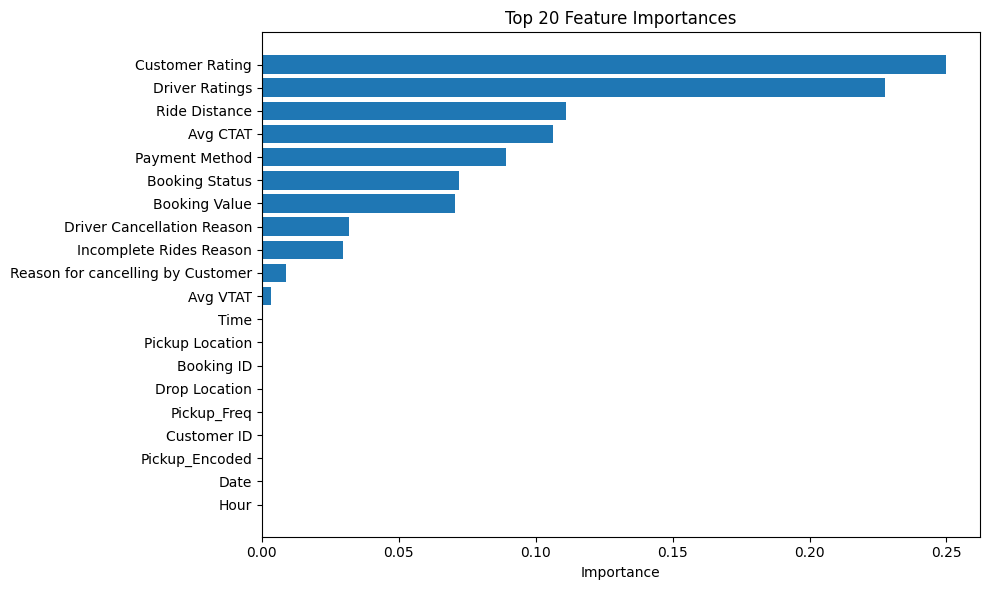

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 可视化前 20
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'][:20][::-1], feat_df['Importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.savefig('Top 20 Feature Importances.png', dpi=300)
plt.show()

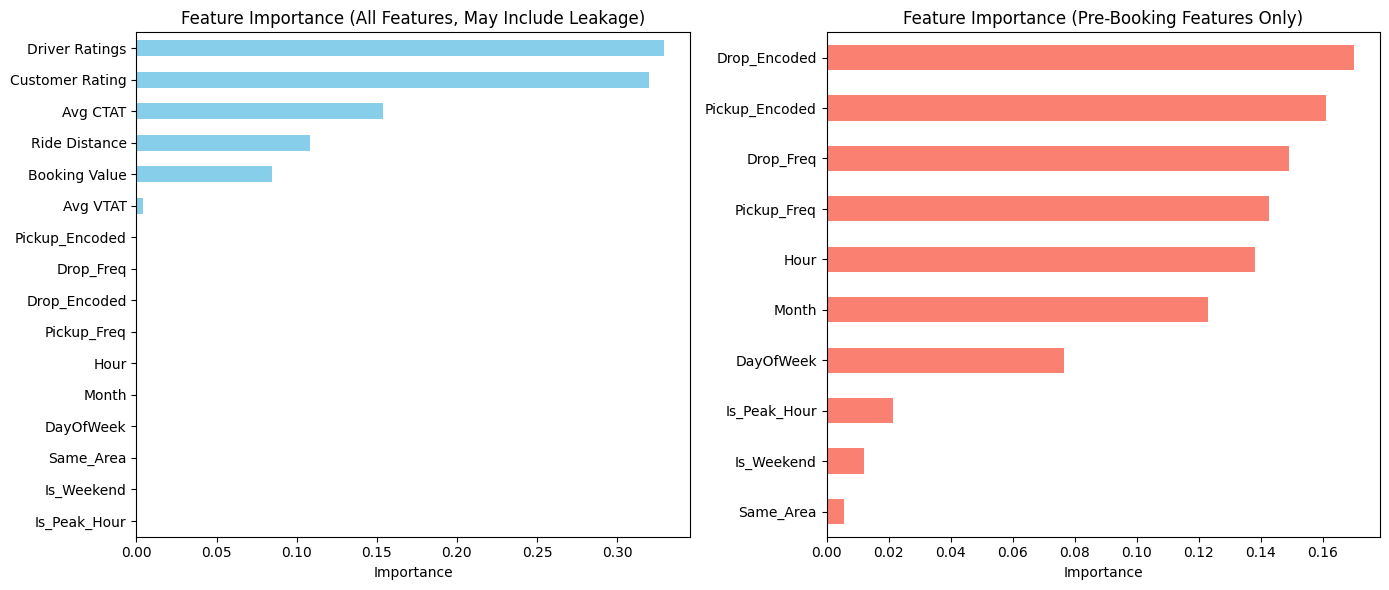

In [7]:
# =========================
# Feature Importance Analysis with Leakage Consideration
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your processed data
df = pd.read_csv('ncr_ride_bookings_engineered_fixed.csv')

# =========================
# Step 1: Define target
# =========================
y = df['Is_Cancelled']

# =========================
# Step 2: Feature Sets
# 2a: All candidate features (may contain leakage)
all_features = [
    'Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Booking Value',
    'Driver Ratings', 'Customer Rating', 'Hour', 'DayOfWeek',
    'Month', 'Is_Weekend', 'Is_Peak_Hour', 'Pickup_Freq',
    'Drop_Freq', 'Pickup_Encoded', 'Drop_Encoded', 'Same_Area'
]

# 2b: Features available before booking (exclude leakage)
pre_booking_features = [
    'Hour', 'DayOfWeek', 'Month', 'Is_Weekend', 'Is_Peak_Hour',
    'Pickup_Freq', 'Drop_Freq', 'Pickup_Encoded', 'Drop_Encoded', 'Same_Area'
]

# =========================
# Step 3: Train RF on all features
# =========================
X_all = df[all_features]
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.3, random_state=42, stratify=y
)

rf_all = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'
)
rf_all.fit(X_train_all, y_train)

# Feature importance
importance_all = pd.Series(rf_all.feature_importances_, index=all_features).sort_values(ascending=False)

# =========================
# Step 4: Train RF on pre-booking features
# =========================
X_pre = df[pre_booking_features]
X_train_pre, X_test_pre, _, _ = train_test_split(
    X_pre, y, test_size=0.3, random_state=42, stratify=y
)

rf_pre = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'
)
rf_pre.fit(X_train_pre, y_train)

# Feature importance
importance_pre = pd.Series(rf_pre.feature_importances_, index=pre_booking_features).sort_values(ascending=False)

# =========================
# Step 5: Visualization
# =========================
plt.figure(figsize=(14,6))

# Original Importance
plt.subplot(1,2,1)
importance_all.plot(kind='barh', color='skyblue')
plt.title('Feature Importance (All Features, May Include Leakage)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()

# Pre-Booking Importance
plt.subplot(1,2,2)
importance_pre.plot(kind='barh', color='salmon')
plt.title('Feature Importance (Pre-Booking Features Only)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('Feature Importance Comparison', dpi=300)
plt.show()


In [8]:
# ======================
# 1. Load libraries
# ======================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# ======================
# 2. Import Dataset
# ======================
df = pd.read_csv('ncr_ride_bookings.csv')

# ======================
# 3. Filter only customer cancellations
# ======================
df = df[df["Booking Status"].isin([
    "Cancelled by Customer", 
    "Completed",
    "Cancelled by Driver",
    "Incomplete",
    "No Driver Found"
])]

# ======================
# 4. Select features + target
#    （你可以再加字段）
# ======================
features = [ "Vehicle Type", "Pickup Location", "Drop Location", "Avg VTAT", "Booking Value" ]

df["Target"] = (df["Booking Status"] == "Cancelled by Customer").astype(int)

X = df[features]
y = df["Target"]   # 注意这里必须用 Target，而不是 Booking Status
# ======================
# 5. Split Train/Test
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ======================
# 6. Preprocessing
#    - Numerical: mean fill
#    - Categorical: unknown fill + OneHot
# ======================
numeric_cols = ["Avg VTAT"]
categorical_cols = ["Vehicle Type", "Pickup Location", "Drop Location"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols)
    ]
)

# ======================
# 7. Random Forest model
# ======================
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", rf)
])

# ======================
# 8. Train model
# ======================
pipeline.fit(X_train, y_train)

# ======================
# 9. Prediction
# ======================
y_pred = pipeline.predict(X_test)

# ======================
# 10. Output results
# ======================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report(before SMOTE):")
print(classification_report(y_test, y_pred))

Accuracy: 0.93

Classification Report(before SMOTE):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41850
           1       0.00      0.00      0.00      3150

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.86      0.93      0.90     45000



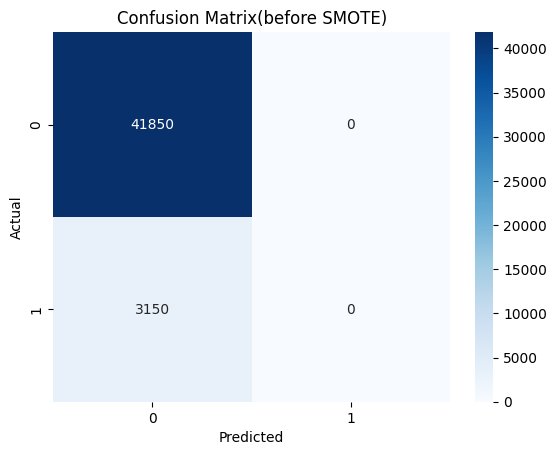

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix(before SMOTE)")
plt.savefig('Confusion Matrix(before SMOTE).png', dpi=300)
plt.show()

In [10]:
!pip install imbalanced-learn

Accuracy: 0.9511555555555555

Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     41850
           1       0.90      0.34      0.49      3150

    accuracy                           0.95     45000
   macro avg       0.93      0.67      0.73     45000
weighted avg       0.95      0.95      0.94     45000



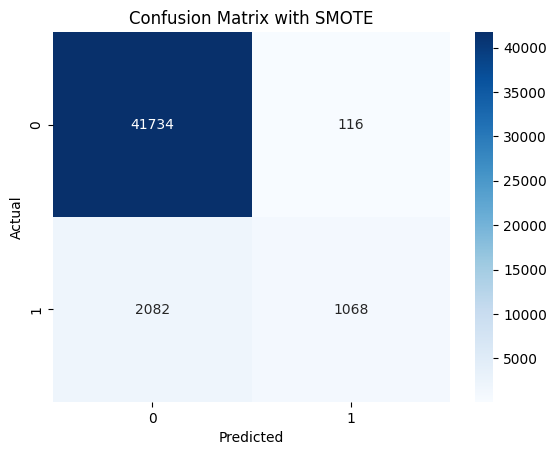

In [11]:
# ======================
# 额外库
# ======================
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ======================
# 1. SMOTE Pipeline
# ======================
# 保留之前的 preprocessor
rf_smote = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

pipeline_smote = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("rf", rf_smote)
])

# ======================
# 2. 训练模型
# ======================
pipeline_smote.fit(X_train, y_train)

# ======================
# 3. 预测
# ======================
y_pred = pipeline_smote.predict(X_test)

# ======================
# 4. 评估
# ======================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred))

# ======================
# 5. 混淆矩阵可视化
# ======================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with SMOTE")
plt.savefig('Confusion Matrix with SMOTE.png', dpi=300)
plt.show()

=== Random Forest BEFORE SMOTE ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41850
           1       0.97      0.34      0.50      3150

    accuracy                           0.95     45000
   macro avg       0.96      0.67      0.74     45000
weighted avg       0.95      0.95      0.94     45000

=== Random Forest AFTER SMOTE ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     41850
           1       0.89      0.34      0.49      3150

    accuracy                           0.95     45000
   macro avg       0.92      0.67      0.73     45000
weighted avg       0.95      0.95      0.94     45000



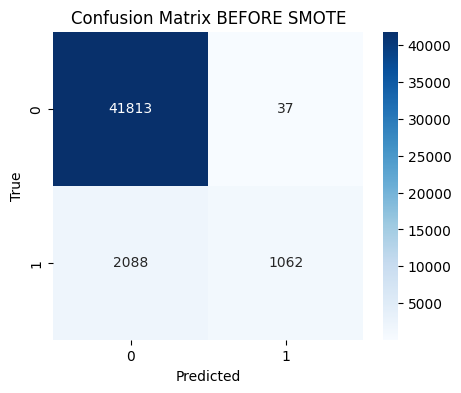

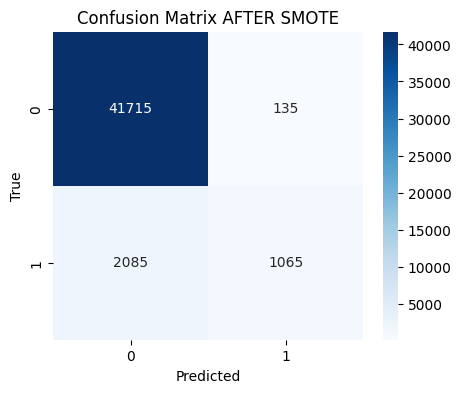

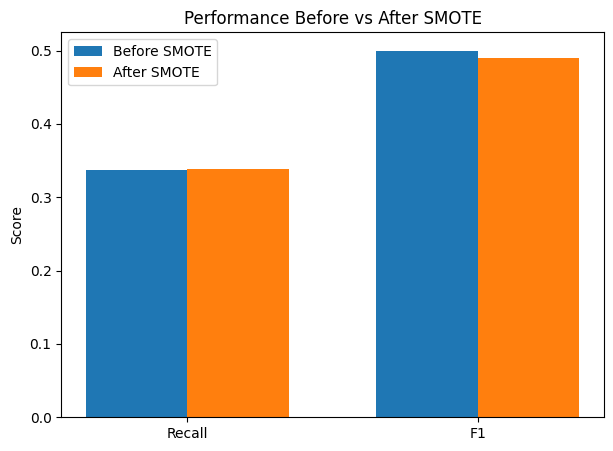

In [12]:
# =====================
# IMPORTS
# =====================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

# =====================
# 1. Feature / Target
# =====================
features = ["Vehicle Type", "Pickup Location", "Drop Location", "Avg VTAT"]
df["Target"] = (df["Booking Status"] == "Cancelled by Customer").astype(int)

X = df[features]
y = df["Target"]

# 分离数值列 / 类别列
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# =====================
# 2. Preprocessor
# =====================
preprocessor = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="mean"), numeric_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

# =====================
# 3. Train/Test Split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 保留一份测试集标签用于后面对比
y_test_before = y_test.copy()
y_test_after = y_test.copy()      # SMOTE 不动测试集

# =====================
# 4. RF WITHOUT SMOTE
# =====================
rf_no_smote = Pipeline([
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

rf_no_smote.fit(X_train, y_train)
y_pred_before = rf_no_smote.predict(X_test)

print("=== Random Forest BEFORE SMOTE ===")
print(classification_report(y_test_before, y_pred_before))

# =====================
# 5. SMOTE
# =====================
# 对训练集 oversample
X_train_prep = preprocessor.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_prep, y_train)

# =====================
# 6. RF AFTER SMOTE
# =====================
rf_after_smote = RandomForestClassifier(random_state=42)
rf_after_smote.fit(X_train_res, y_train_res)

# 测试集仍然要经过 preprocess
X_test_prep = preprocessor.transform(X_test)
y_pred_after = rf_after_smote.predict(X_test_prep)

print("=== Random Forest AFTER SMOTE ===")
print(classification_report(y_test_after, y_pred_after))


# =======================================================
# 7. CONFUSION MATRIX (Before / After SMOTE)
# =======================================================
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_conf_matrix(y_test_before, y_pred_before, "Confusion Matrix BEFORE SMOTE")
plot_conf_matrix(y_test_after, y_pred_after, "Confusion Matrix AFTER SMOTE")


# =======================================================
# 8. F1 / Recall 对比图
# =======================================================
from sklearn.metrics import precision_score, recall_score, f1_score

recall_before = recall_score(y_test_before, y_pred_before)
recall_after = recall_score(y_test_after, y_pred_after)

f1_before = f1_score(y_test_before, y_pred_before)
f1_after = f1_score(y_test_after, y_pred_after)

labels = ["Recall", "F1"]
before_values = [recall_before, f1_before]
after_values = [recall_after, f1_after]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, before_values, width, label="Before SMOTE")
plt.bar(x + width/2, after_values, width, label="After SMOTE")
plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Performance Before vs After SMOTE")
plt.legend()
plt.show()

In [19]:
df2 = X.copy()
for col in df2.columns:
    if df2[col].dtype == 'object':
        print(col, df2[col].isnull().sum())

Vehicle Type 0
Pickup Location 0
Drop Location 0


In [20]:
print(df.isnull().sum())

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                                  0
Avg CTAT                              37500
Cancelled Rides by Customer          129000
Reason for cancelling by Customer    129000
Cancelled Rides by Driver            112500
Driver Cancellation Reason           112500
Incomplete Rides                     130500
Incomplete Rides Reason              130500
Booking Value                         37500
Ride Distance                         37500
Driver Ratings                        46500
Customer Rating                       46500
Payment Method                        37500
Target                                    0
dtype: int64


In [21]:
print(df['Booking Status'].value_counts())

Booking Status
Completed                93000
Cancelled by Driver      27000
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64
